## İmport and  prep section

,Text,Label
0,"UpgrdCentre Orange customer, you may now claim...",1
1,"Loan for any purpose £500 - £75,000. Homeowner...",1
2,Congrats! Nokia 3650 video camera phone is you...,1
3,URGENT! Your Mobile number has been awarded wi...,1
4,Someone has contacted our dating service and e...,1
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,0
121,Try to do something dear. You read something f...,0
122,Sun ah... Thk mayb can if dun have anythin on....,0
123,"SYMPTOMS when U are in love: ""1.U like listeni...",0


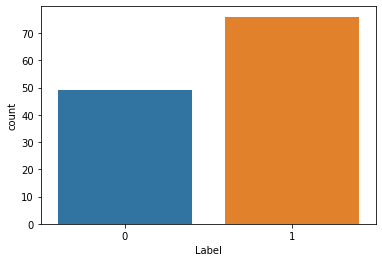

In [1]:
import pandas as pd 
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.linear_model import LogisticRegression  
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)




#data=pd.read_csv('SMS_test.csv')
#data    ->böyle yapınca ''utf-8' codec can't decode byte 0xa3 in position 237: invalid start byte'' hatası alındı araştırıldı şöyle degıstı
dataset=pd.read_csv('SMS_test.csv',encoding='unicode_escape')
#dataset # S.No kolonu gereksiz zaten indexde sıralıyor onu atıyorum
dataset.drop(['S. No.'],axis=1,inplace=True)
dataset['Label'].unique() #spam non-spam var bunu 0-1 çevirelim
label_encoder = preprocessing.LabelEncoder() 
dataset['Label'] = label_encoder.fit_transform(dataset['Label'])   #spam=1 none-spam=0 yapıldı.
dataset = dataset.rename(columns = {"Message_body" : "Text"})
sns.countplot(x="Label", data = dataset) #75 tane 1 40-50 arası 0 label var
dataset 


## World Cloud denemesi

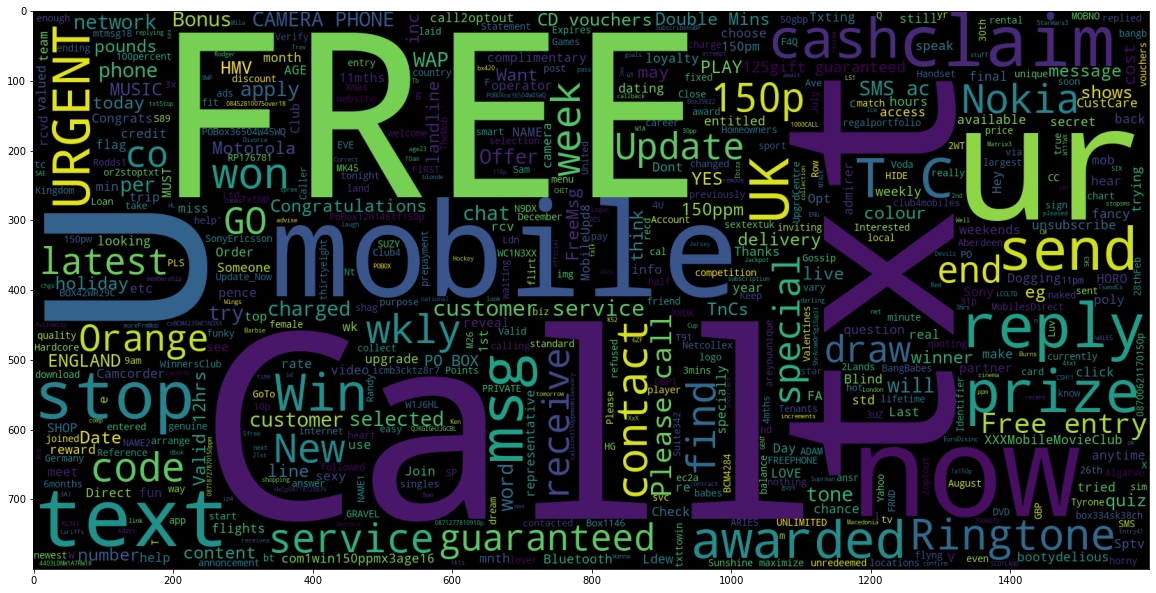

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(dataset[dataset.Label == 1].Text))
plt.imshow(wc )

# Datayı hazırlama + kod kopyalandı + anlaşılıp geçildi 

In [6]:
def tokenize(x):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(x)
                                
def stemmer(x):
    stemmer = PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in x])
 
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in x])

stop_words = stopwords.words('english')

#  Preprocess train dataset
# remove special characters from text column
dataset.Text = dataset.Text.str.replace('[#,@,&]', '')
# Remove digits
dataset.Text = dataset.Text.str.replace(' \d+ ','')
#Remove www
dataset.Text = dataset.Text.str.replace('w{3}','')
# remove urls
dataset.Text = dataset.Text.str.replace("http\S+", "")
# remove multiple spaces with single space
dataset.Text = dataset.Text.str.replace('\s+', ' ')
#remove all single characters
dataset.Text = dataset.Text.str.replace(r'\s+[a-zA-Z]\s+', '')
dataset['tokens'] = dataset['Text'].map(tokenize)
dataset['lemma'] = dataset['tokens'].map(lemmatize)
dataset['stems'] = dataset['tokens'].map(stemmer)



In [7]:
dataset

,Text,Label,tokens,lemma,stems
0,UpgrdCentre Orange customer you may now claim ...,1,"[UpgrdCentre, Orange, customer, you, may, now,...",UpgrdCentre Orange customer you may now claim ...,upgrdcentr orang custom you may now claim your...
1,Loan for any purpose £500 - £75000. Homeowners...,1,"[Loan, for, any, purpose, 500, 75000, Homeowne...",Loan for any purpose 500 75000 Homeowners Tena...,loan for ani purpos 500 75000 homeown tenant w...
2,Congrats! Nokiavideo camera phone is your Call...,1,"[Congrats, Nokiavideo, camera, phone, is, your...",Congrats Nokiavideo camera phone is your CallC...,congrat nokiavideo camera phone is your callca...
3,URGENT! Your Mobile number has been awarded wi...,1,"[URGENT, Your, Mobile, number, has, been, awar...",URGENT Your Mobile number ha been awarded with...,urgent your mobil number ha been award with 20...
4,Someone has contacted our dating service and e...,1,"[Someone, has, contacted, our, dating, service...",Someone ha contacted our dating service and en...,someon ha contact our date servic and enter yo...
...,...,...,...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,0,"[7, wonders, in, My, WORLD, 7th, You, 6th, Ur,...",7 wonder in My WORLD 7th You 6th Ur style 5th ...,7 wonder in My world 7th you 6th Ur style 5th ...
121,Try to do something dear. You read something f...,0,"[Try, to, do, something, dear, You, read, some...",Try to do something dear You read something fo...,tri to do someth dear you read someth for exam
122,Sun ah... Thk mayb can if dun have anythin on....,0,"[Sun, ah, Thk, mayb, can, if, dun, have, anyth...",Sun ah Thk mayb can if dun have anythin on Thk...,sun ah thk mayb can if dun have anythin on thk...
123,"SYMPTOMS whenare in love: ""1.U like listening ...",0,"[SYMPTOMS, whenare, in, love, 1, U, like, list...",SYMPTOMS whenare in love 1 U like listening so...,symptom whenar in love 1 U like listen song 2 ...


## Train_Test_Split Bölümü

In [20]:

cv = CountVectorizer(max_features=1500, analyzer='word', lowercase=False) 
X = cv.fit_transform(dataset['Text'])  
y = pd.DataFrame(dataset['Label']) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  


#  Model bölümü

In [21]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
roc_auc_score(y_test, y_pred)

C:\Users\Ozkan\Anaconda3\envs\Hello\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8615384615384616